In [73]:
# https://www.kaggle.com/datasets/deepankurk/flight-take-off-data-jfk-airport

## Data Dictionary below. 
## No units supplied on the site - speed in km/h or mph? temp in C or F or K? delays and times in hours, mins, secs? 
## Site confuses departures and arrivals too (I've corrected this manually). 
## Suggests poor quality of source data.

#Month

#DAY_OF_MONTH Date of flight

#DAY_OF_WEEK Day of the week

#OP_UNIQUE_CARRIER Carrier Code(Should generally be carrier company)

#TAIL_NUM Airflight Number

#DEST Destination

#DEP_DELAY Departure delay of the flight

#CRS_ELAPSED_TIME Scheduled hourney time of the flight

#DISTANCE Distance of the flight.

#CRS_DEP_M Scheduled Departure Time.

#DEP_TIME_M Actual Departure TIme(Gate checkout of the flight not the take off time)

#CRS_ARR_M Scheduled Arrival Time

#Temperature

#Dew Point

#Humidity

#Wind

#Wind Speed

#Wind Gust

#Pressure

#Condition Weather Conditions

#sch_dep No. of flights scheduled for departure.

#sch_arr NO. of flights scheduled for arrival.

#TAXI_OUT Taxi-out time(Run away time)(Target variable)


In [ ]:
## Required modules

# Install these first
#pip install yfinance
#pip install seaborn

In [2]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

In [3]:
dfJRKFlights = pd.read_csv('M1_final.csv')

In [4]:
dfJRKFlights.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [5]:
dfJRKFlights.tail()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13
28819,1,31,5,B6,N958JB,BQN,-1,225,1576,1439,...,38,96,N,6,0,30.18,Cloudy,19,23,15


In [6]:
dfJRKFlights.info()
#gonna have to do something about those objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [7]:
# Confirm those null values
dfJRKFlights.isnull().sum()
# get rid of nulls?

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [8]:
dfJRKFlights.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


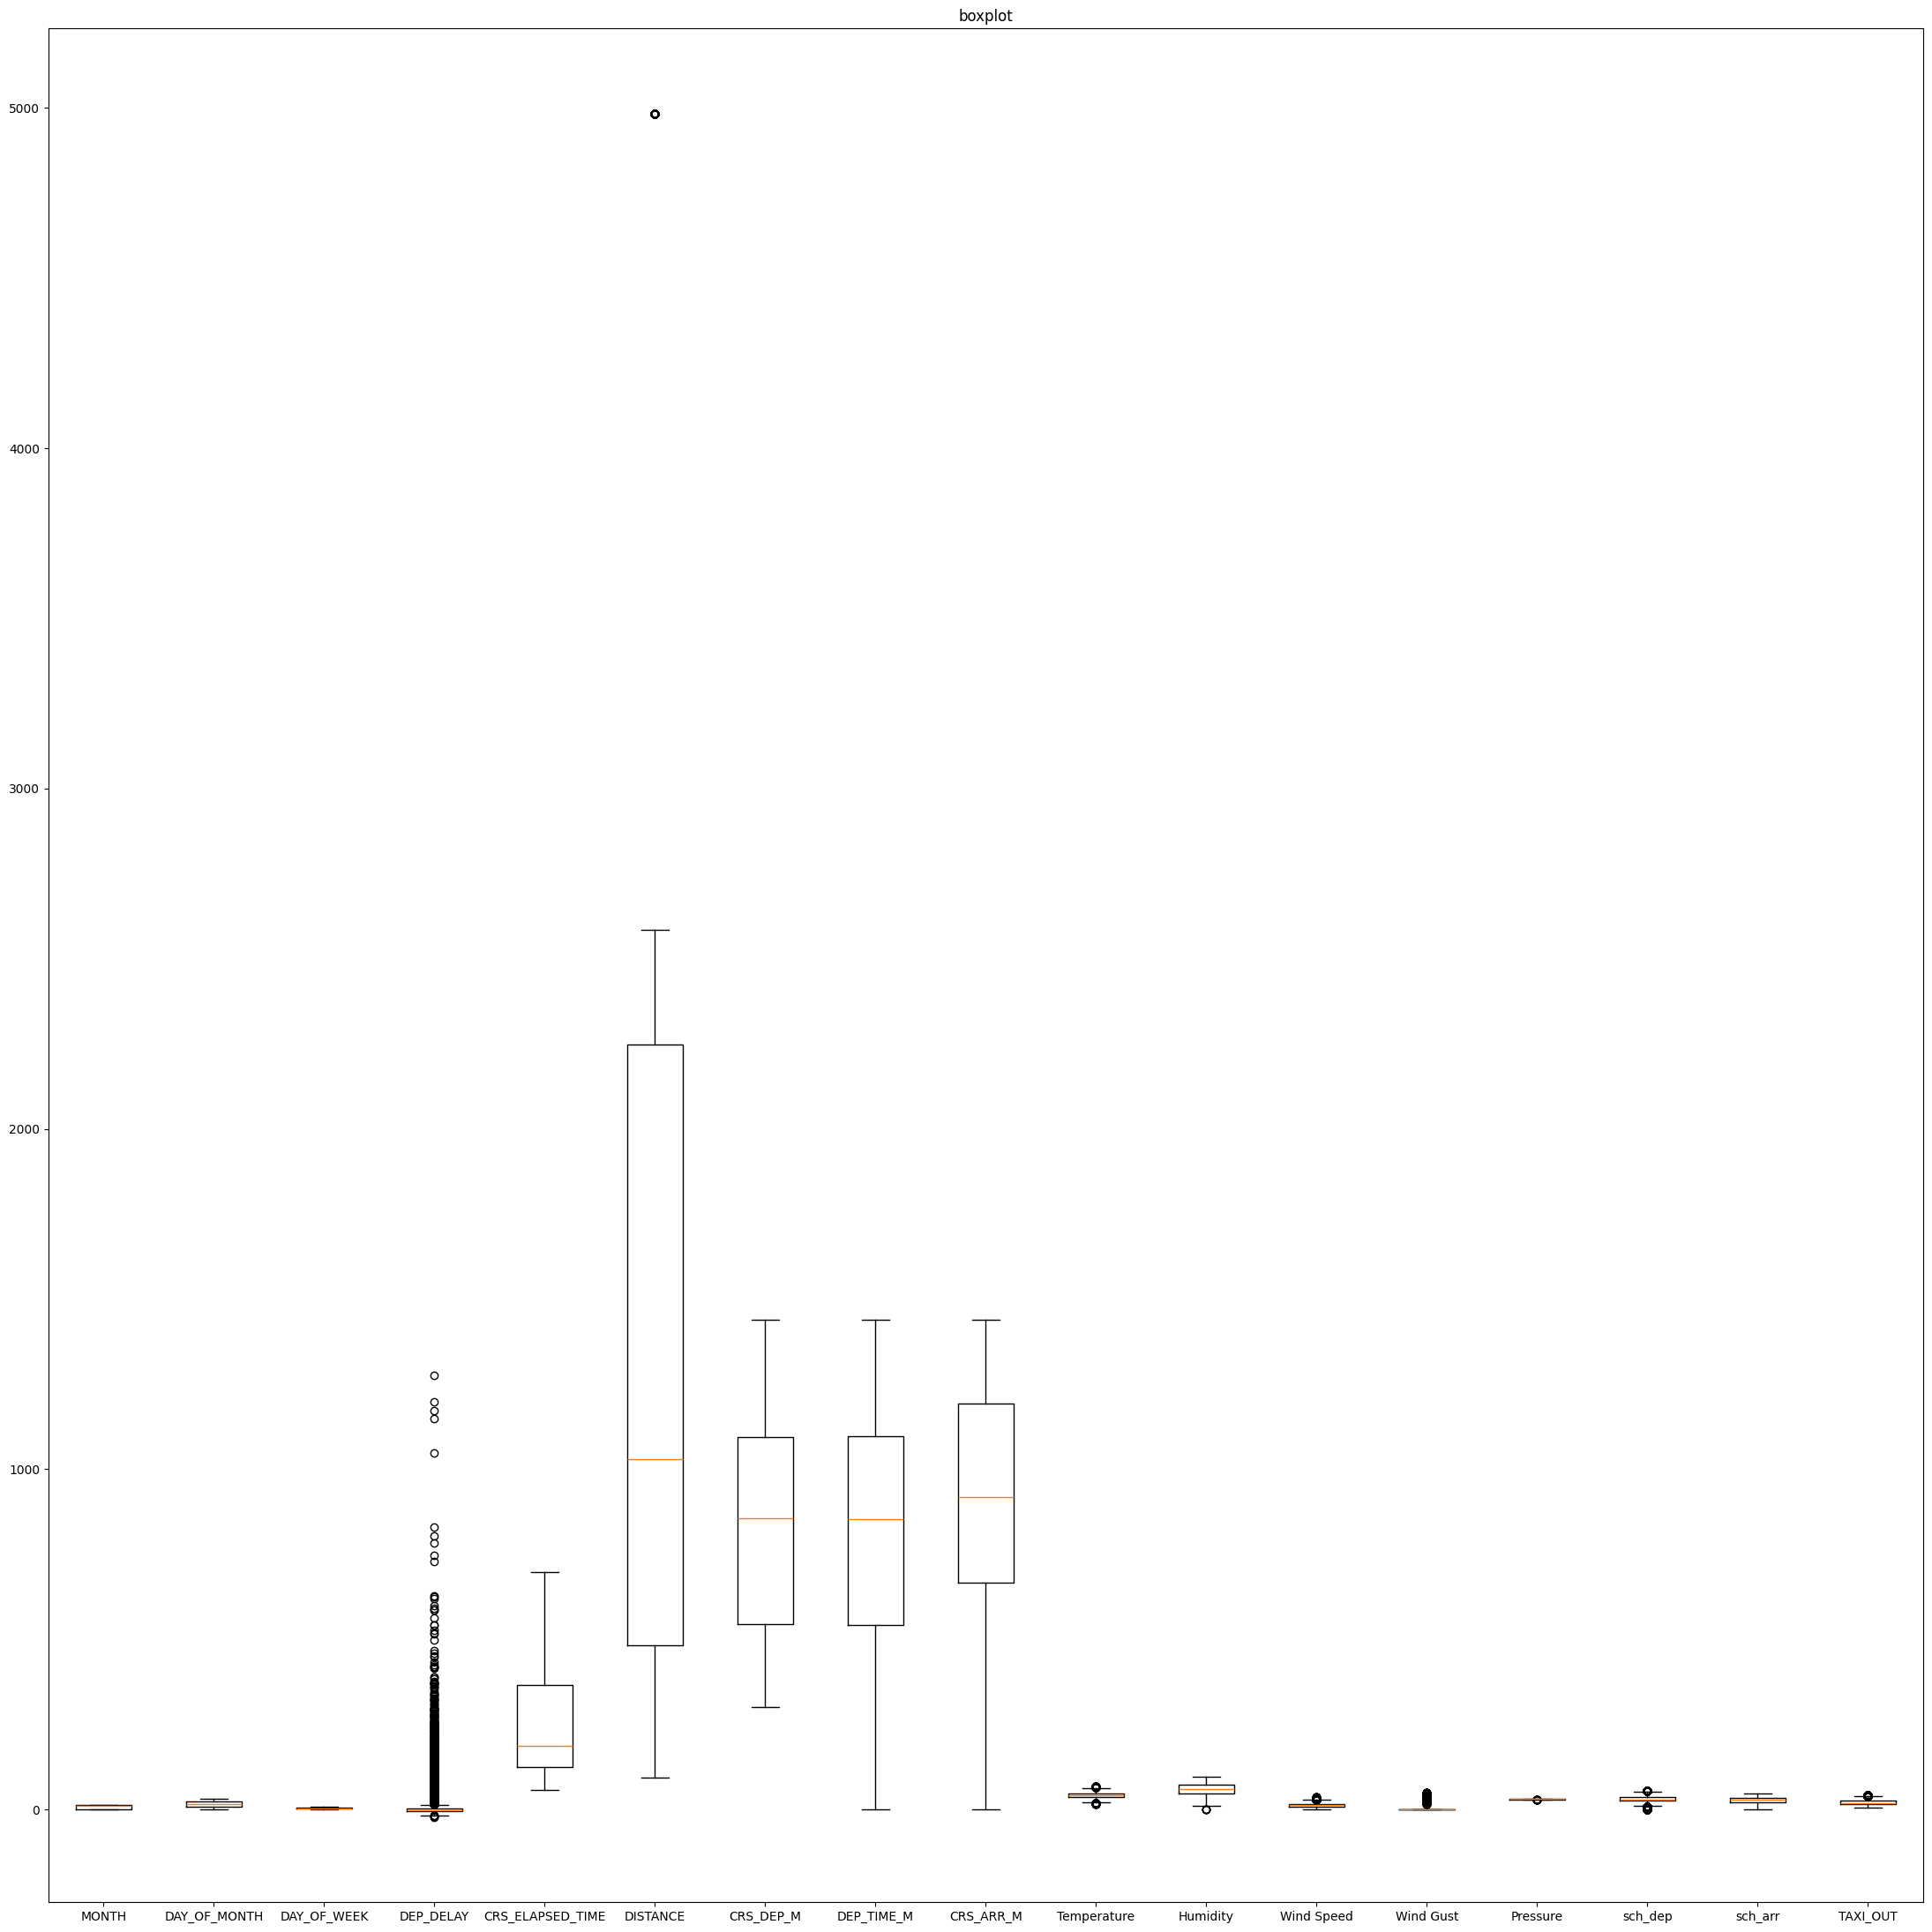

In [9]:
# boxplot to look at essential characteristics
plt.figure(figsize=(22,22))
# boxplots can't deal with non ints and floats, so get a new df without those data types
dfboxplotdata = dfJRKFlights[['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','DEP_DELAY','CRS_ELAPSED_TIME','DISTANCE','CRS_DEP_M','DEP_TIME_M','CRS_ARR_M','Temperature','Humidity','Wind Speed','Wind Gust','Pressure','sch_dep','sch_arr','TAXI_OUT']]
plt.boxplot(dfboxplotdata, tick_labels = ['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','DEP_DELAY','CRS_ELAPSED_TIME','DISTANCE','CRS_DEP_M','DEP_TIME_M','CRS_ARR_M','Temperature','Humidity','Wind Speed','Wind Gust','Pressure','sch_dep','sch_arr','TAXI_OUT'])
plt.title('boxplot')
plt.tight_layout()
# big variances in distance and departure delay

<function matplotlib.pyplot.show(close=None, block=None)>

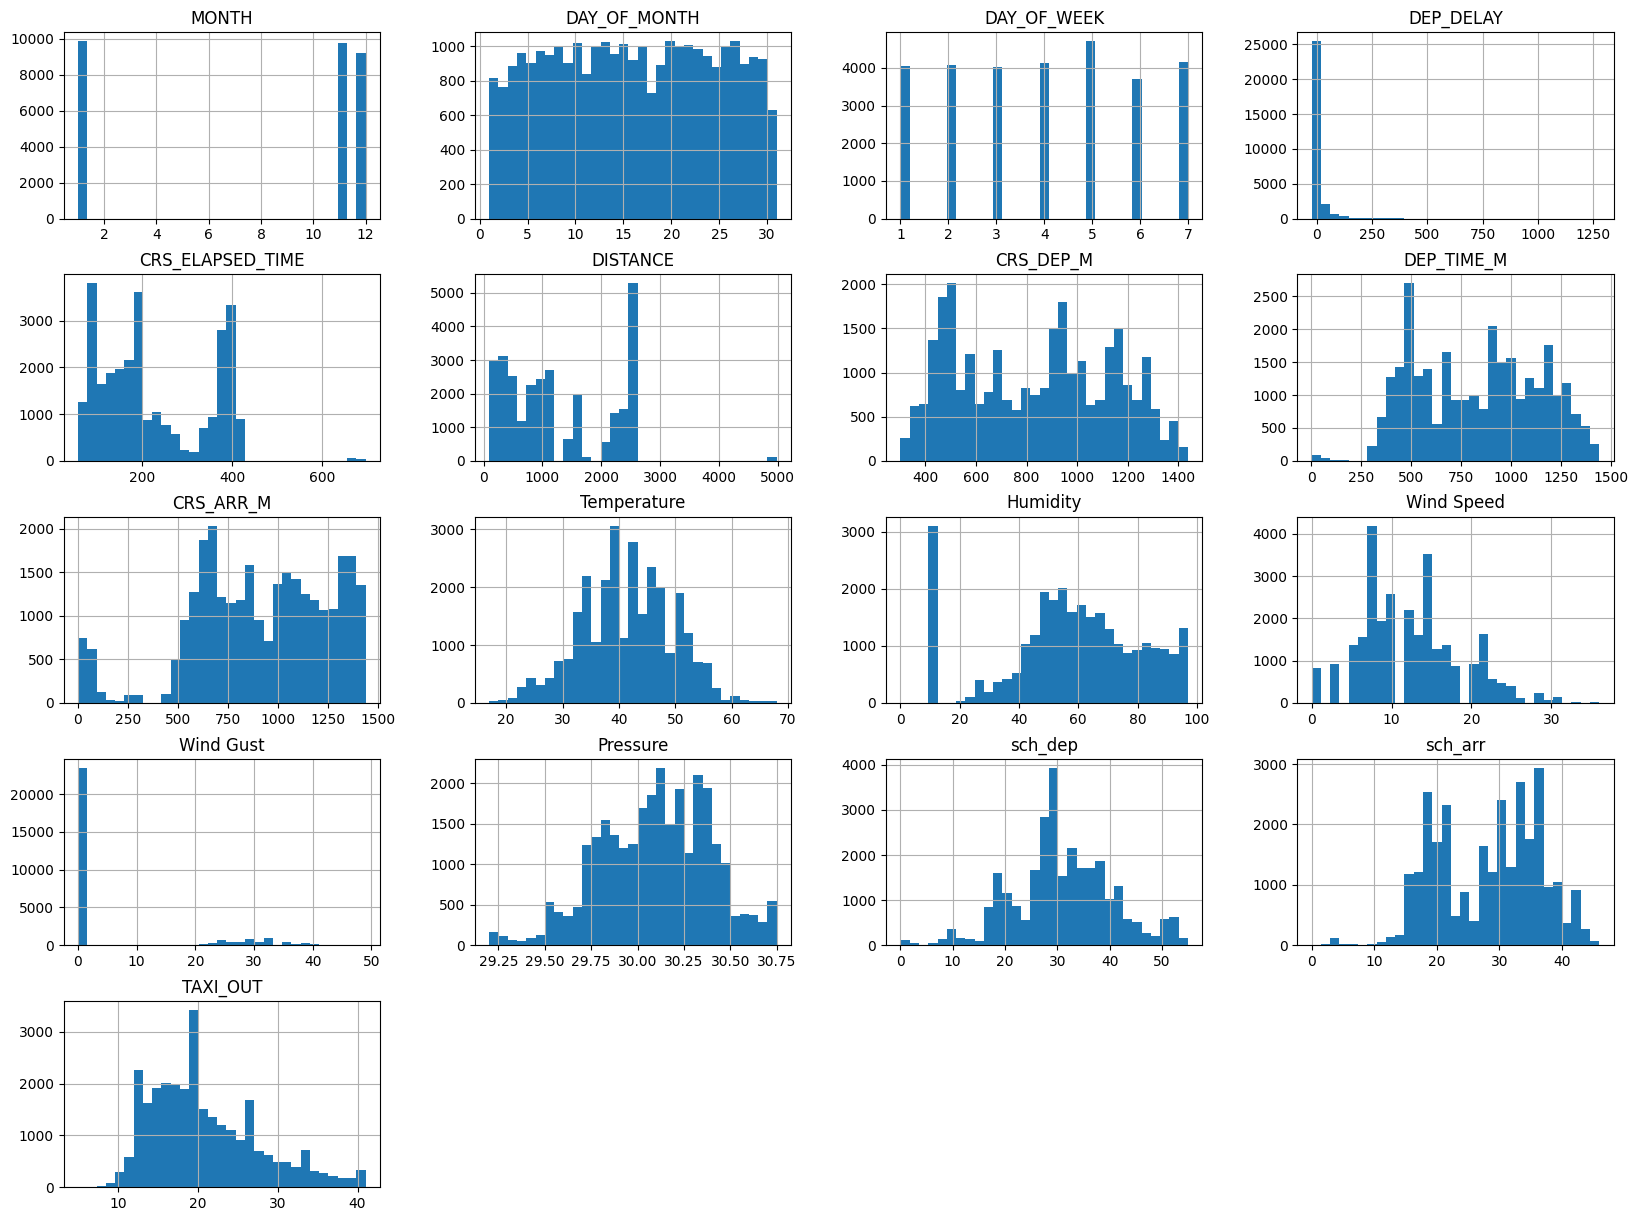

In [10]:
# Let's have a look at some basic counts
dfJRKFlights.hist(bins=31, figsize=(20, 15))
plt.show

In [11]:
# What do the carriers look like?
byCarrier = dfJRKFlights.groupby(['OP_UNIQUE_CARRIER']).count()
byCarrier
# carrier repeats so will need to convert numeric somehow

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
OP_UNIQUE_CARRIER,,,,,,,,,,,,,,,,,,,,,
9E,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,...,4485,4485,4484,4485,4485,4485,4485,4485,4485,4485
AA,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
AS,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,...,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111
B6,9589,9589,9589,9589,9589,9589,9589,9589,9589,9589,...,9589,9589,9588,9589,9589,9589,9589,9589,9589,9589
DL,7680,7680,7680,7680,7680,7680,7680,7680,7680,7680,...,7680,7680,7680,7680,7680,7680,7680,7680,7680,7680
HA,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
MQ,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,...,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045
OO,311,311,311,311,311,311,311,311,311,311,...,311,311,311,311,311,311,311,311,311,311
YX,914,914,914,914,914,914,914,914,914,914,...,914,914,914,914,914,914,914,914,914,914


<Axes: ylabel='OP_UNIQUE_CARRIER'>

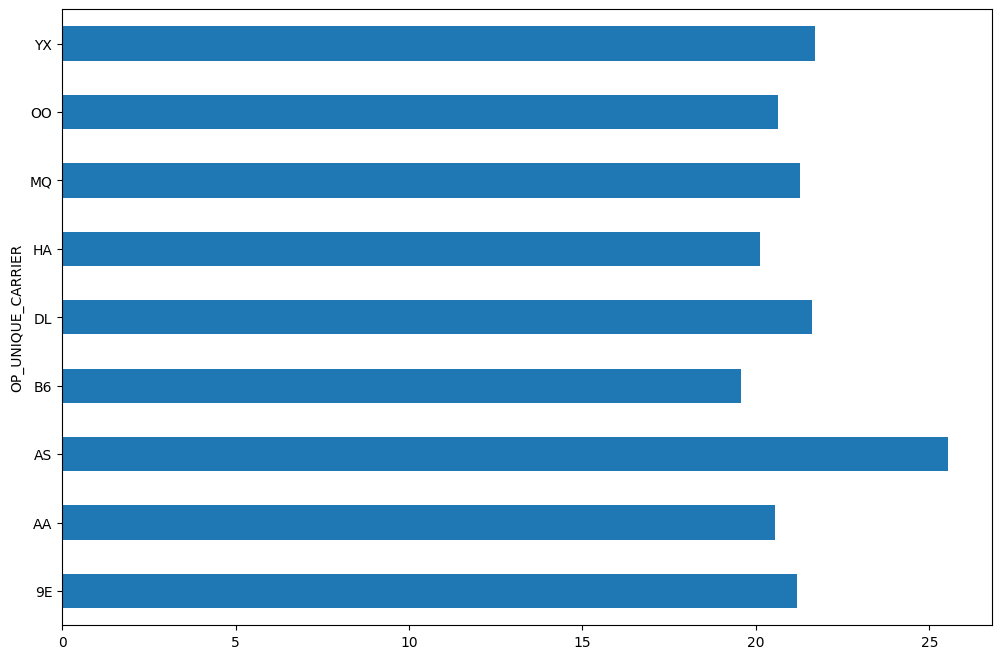

In [12]:
plt.figure(figsize=(12,8))
dfJRKFlights.groupby('OP_UNIQUE_CARRIER')['TAXI_OUT'].mean().plot(kind="barh")

In [13]:
byDayOfWeek = dfJRKFlights.groupby(['DAY_OF_WEEK']).count()
byDayOfWeek

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
DAY_OF_WEEK,,,,,,,,,,,,,,,,,,,,,
1,4051,4051,4051,4051,4051,4051,4051,4051,4051,4051,...,4051,4051,4051,4051,4051,4051,4051,4051,4051,4051
2,4065,4065,4065,4065,4065,4065,4065,4065,4065,4065,...,4065,4065,4065,4065,4065,4065,4065,4065,4065,4065
3,4013,4013,4013,4013,4013,4013,4013,4013,4013,4013,...,4013,4013,4013,4013,4013,4013,4013,4013,4013,4013
4,4135,4135,4135,4135,4135,4135,4135,4135,4135,4135,...,4135,4135,4133,4135,4135,4135,4135,4135,4135,4135
5,4708,4708,4708,4708,4708,4708,4708,4708,4708,4708,...,4708,4708,4708,4708,4708,4708,4708,4708,4708,4708
6,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698,...,3698,3698,3698,3698,3698,3698,3698,3698,3698,3698
7,4150,4150,4150,4150,4150,4150,4150,4150,4150,4150,...,4150,4150,4150,4150,4150,4150,4150,4150,4150,4150


In [14]:
byTAIL_NUM = dfJRKFlights.groupby(['TAIL_NUM']).count()
byTAIL_NUM
# tail numbers repeat, so faults with the aircraft could be causing delays so keep in dataset. will need to conver strings to numeric, somehow

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
TAIL_NUM,,,,,,,,,,,,,,,,,,,,,
N101DU,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
N101HQ,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
N101NN,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
N102DU,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
N102HQ,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N997JL,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
N997NN,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
N998AT,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [15]:
byWind = dfJRKFlights.groupby(['Wind']).count()
byWind
# convert to actual direction so it's numeric, will need to look at how to do this. calm I'll do as -1 and var as 361 as not sure how else to deal

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
Wind,,,,,,,,,,,,,,,,,,,,,
CALM,835,835,835,835,835,835,835,835,835,835,...,835,835,835,835,835,835,835,835,835,835
E,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,...,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
ENE,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,...,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124
ESE,466,466,466,466,466,466,466,466,466,466,...,466,466,466,466,466,466,466,466,466,466
N,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453,...,2453,2453,2453,2453,2453,2453,2453,2453,2453,2453
NE,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,...,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
NNE,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280,...,1280,1280,1280,1280,1280,1280,1280,1280,1280,1280
NNW,2570,2570,2570,2570,2570,2570,2570,2570,2570,2570,...,2570,2570,2570,2570,2570,2570,2570,2570,2570,2570
NW,3173,3173,3173,3173,3173,3173,3173,3173,3173,3173,...,3173,3173,3173,3173,3173,3173,3173,3173,3173,3173


In [16]:
byDEST = dfJRKFlights.groupby(['DEST']).count()
byDEST
# destinations repeat so will need to convert from string to number somehow

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
DEST,,,,,,,,,,,,,,,,,,,,,
ABQ,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
ATL,795,795,795,795,795,795,795,795,795,795,...,795,795,795,795,795,795,795,795,795,795
AUS,485,485,485,485,485,485,485,485,485,485,...,485,485,485,485,485,485,485,485,485,485
BNA,366,366,366,366,366,366,366,366,366,366,...,366,366,366,366,366,366,366,366,366,366
BOS,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,...,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMF,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
SRQ,105,105,105,105,105,105,105,105,105,105,...,105,105,105,105,105,105,105,105,105,105
STT,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62


In [17]:
byDewPoint = dfJRKFlights.groupby(['Dew Point']).count()
byDewPoint
# dew points are integers but show as object for some reason so will need to convert to number somehow

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Temperature,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
Dew Point,,,,,,,,,,,,,,,,,,,,,
-1,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
-2,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
-3,128,128,128,128,128,128,128,128,128,128,...,128,128,128,128,128,128,128,128,128,128
0,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
10,147,147,147,147,147,147,147,147,147,147,...,147,147,145,147,147,147,147,147,147,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
6,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
7,235,235,235,235,235,235,235,235,235,235,...,235,235,235,235,235,235,235,235,235,235


In [18]:
byCondition = dfJRKFlights.groupby(['Condition']).count()
byCondition
# need to convert strings to numbers somehow

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
Condition,,,,,,,,,,,,,,,,,,,,,
Cloudy,4992,4992,4992,4992,4992,4992,4992,4992,4992,4992,...,4992,4992,4992,4992,4992,4992,4992,4992,4992,4992
Cloudy / Windy,341,341,341,341,341,341,341,341,341,341,...,341,341,341,341,341,341,341,341,341,341
Drizzle and Fog,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Fair,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038,...,5038,5038,5038,5038,5038,5038,5038,5038,5038,5038
Fair / Windy,918,918,918,918,918,918,918,918,918,918,...,918,918,918,918,918,918,918,918,918,918
Fog,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147
Fog / Windy,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
Heavy Rain,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
Heavy Rain / Windy,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


In [19]:
# drop rows with nulls (just two)
dfJRKFlights.dropna(inplace=True) 

# convert directions (N,S,E,W) into degrees so it's a continuous numerical variable
wind_dict = {'CALM': -1, 'N': 0,'NNE':22.5,'NE':45,'ENE':67.5,'E':90,'ESE':112.5,'SE':135,'SSE':157.5,'S':180,'SSW':202.5,'SW':225,'WSW':247.5,'W':270, 'WNW':292.5, 'NW':315, 'NNW': 337.5,'VAR':361}

for item in wind_dict:
    dfJRKFlights.loc[dfJRKFlights['Wind'] == item, "Wind"] = wind_dict[item] 
    
# change data type of dew point as it's already numeric, and change wind from string to float as it's now numeric with a decimal point
dfJRKFlights['Dew Point'] = dfJRKFlights['Dew Point'].astype('int') 
dfJRKFlights['Wind'] = dfJRKFlights['Wind'].astype('float64')

# I have no idea what this does TBH, other than it converts objects to ints - this code is copied verbatim
from sklearn.preprocessing import LabelEncoder as LE
dfJRKFlights.OP_UNIQUE_CARRIER=LE().fit_transform(dfJRKFlights.OP_UNIQUE_CARRIER)
dfJRKFlights.TAIL_NUM=LE().fit_transform(dfJRKFlights.TAIL_NUM)
dfJRKFlights.DEST=LE().fit_transform(dfJRKFlights.DEST)
dfJRKFlights.Condition =LE().fit_transform(dfJRKFlights.Condition)

# Check the data looks better now
dfJRKFlights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28818 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28818 non-null  int64  
 1   DAY_OF_MONTH       28818 non-null  int64  
 2   DAY_OF_WEEK        28818 non-null  int64  
 3   OP_UNIQUE_CARRIER  28818 non-null  int64  
 4   TAIL_NUM           28818 non-null  int64  
 5   DEST               28818 non-null  int64  
 6   DEP_DELAY          28818 non-null  int64  
 7   CRS_ELAPSED_TIME   28818 non-null  int64  
 8   DISTANCE           28818 non-null  int64  
 9   CRS_DEP_M          28818 non-null  int64  
 10  DEP_TIME_M         28818 non-null  int64  
 11  CRS_ARR_M          28818 non-null  int64  
 12  Temperature        28818 non-null  int64  
 13  Dew Point          28818 non-null  int64  
 14  Humidity           28818 non-null  int64  
 15  Wind               28818 non-null  float64
 16  Wind Speed         28818 no

In [20]:
# Correlation matrix
corr_matrix = dfJRKFlights[['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','OP_UNIQUE_CARRIER','TAIL_NUM','DEST','DEP_DELAY','CRS_ELAPSED_TIME','DISTANCE','CRS_DEP_M','DEP_TIME_M','CRS_ARR_M','Temperature','Dew Point','Humidity','Wind','Wind Speed','Wind Gust','Pressure','Condition','sch_dep','sch_arr','TAXI_OUT']].corr()
corr_matrix

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007274,0.029366,0.015596,-0.004154,0.007022,0.046421,-0.016010,-0.000106,0.001732,...,0.135151,0.012522,-0.072953,-0.034989,-0.050989,-0.085342,0.045305,-0.006131,-0.019737,0.018347
DAY_OF_MONTH,-0.007274,1.000000,-0.029732,0.014115,0.001003,0.004872,-0.036634,0.002779,-0.002746,0.001717,...,-0.040094,0.096218,-0.187170,-0.093178,-0.088981,0.016845,0.024810,-0.003392,0.002210,-0.024065
DAY_OF_WEEK,0.029366,-0.029732,1.000000,0.008258,-0.001776,0.006176,-0.006204,0.000413,0.002450,0.005412,...,-0.073823,0.001627,0.005157,0.095956,0.127689,0.102294,0.062237,0.024416,0.009622,0.028397
OP_UNIQUE_CARRIER,0.015596,0.014115,0.008258,1.000000,-0.006938,-0.010088,0.006017,0.049515,0.061987,0.010447,...,0.015751,0.000115,-0.007020,-0.004742,-0.001228,-0.009184,0.013190,0.050508,0.008926,0.008845
TAIL_NUM,-0.004154,0.001003,-0.001776,-0.006938,1.000000,0.134239,-0.013445,0.086161,0.091836,0.026012,...,0.000255,0.006887,0.002364,0.002404,0.000305,-0.002838,-0.010700,-0.006697,-0.007873,-0.017807
DEST,0.007022,0.004872,0.006176,-0.010088,0.134239,1.000000,-0.012099,0.355462,0.366625,-0.031555,...,0.007599,0.009411,-0.014362,-0.007559,-0.005507,0.002684,-0.002634,0.060580,-0.050524,0.076600
DEP_DELAY,0.046421,-0.036634,-0.006204,0.006017,-0.013445,-0.012099,1.000000,-0.030862,-0.031501,0.102330,...,0.000062,-0.011771,0.032481,0.067819,0.044363,-0.064993,-0.000873,-0.065409,-0.006974,0.034759
CRS_ELAPSED_TIME,-0.016010,0.002779,0.000413,0.049515,0.086161,0.355462,-0.030862,1.000000,0.994465,-0.031249,...,0.007161,0.017192,-0.009744,-0.013545,-0.011959,0.010223,-0.001929,0.083376,-0.067643,0.071007
DISTANCE,-0.000106,-0.002746,0.002450,0.061987,0.091836,0.366625,-0.031501,0.994465,1.000000,-0.040889,...,0.009712,0.015105,-0.009985,-0.010828,-0.009544,0.005744,-0.001990,0.059129,-0.088771,0.060006
CRS_DEP_M,0.001732,0.001717,0.005412,0.010447,0.026012,-0.031555,0.102330,-0.031249,-0.040889,1.000000,...,0.001763,0.003857,0.037252,0.008286,-0.009836,-0.008409,0.019660,-0.025506,0.495274,0.044562


<Axes: >

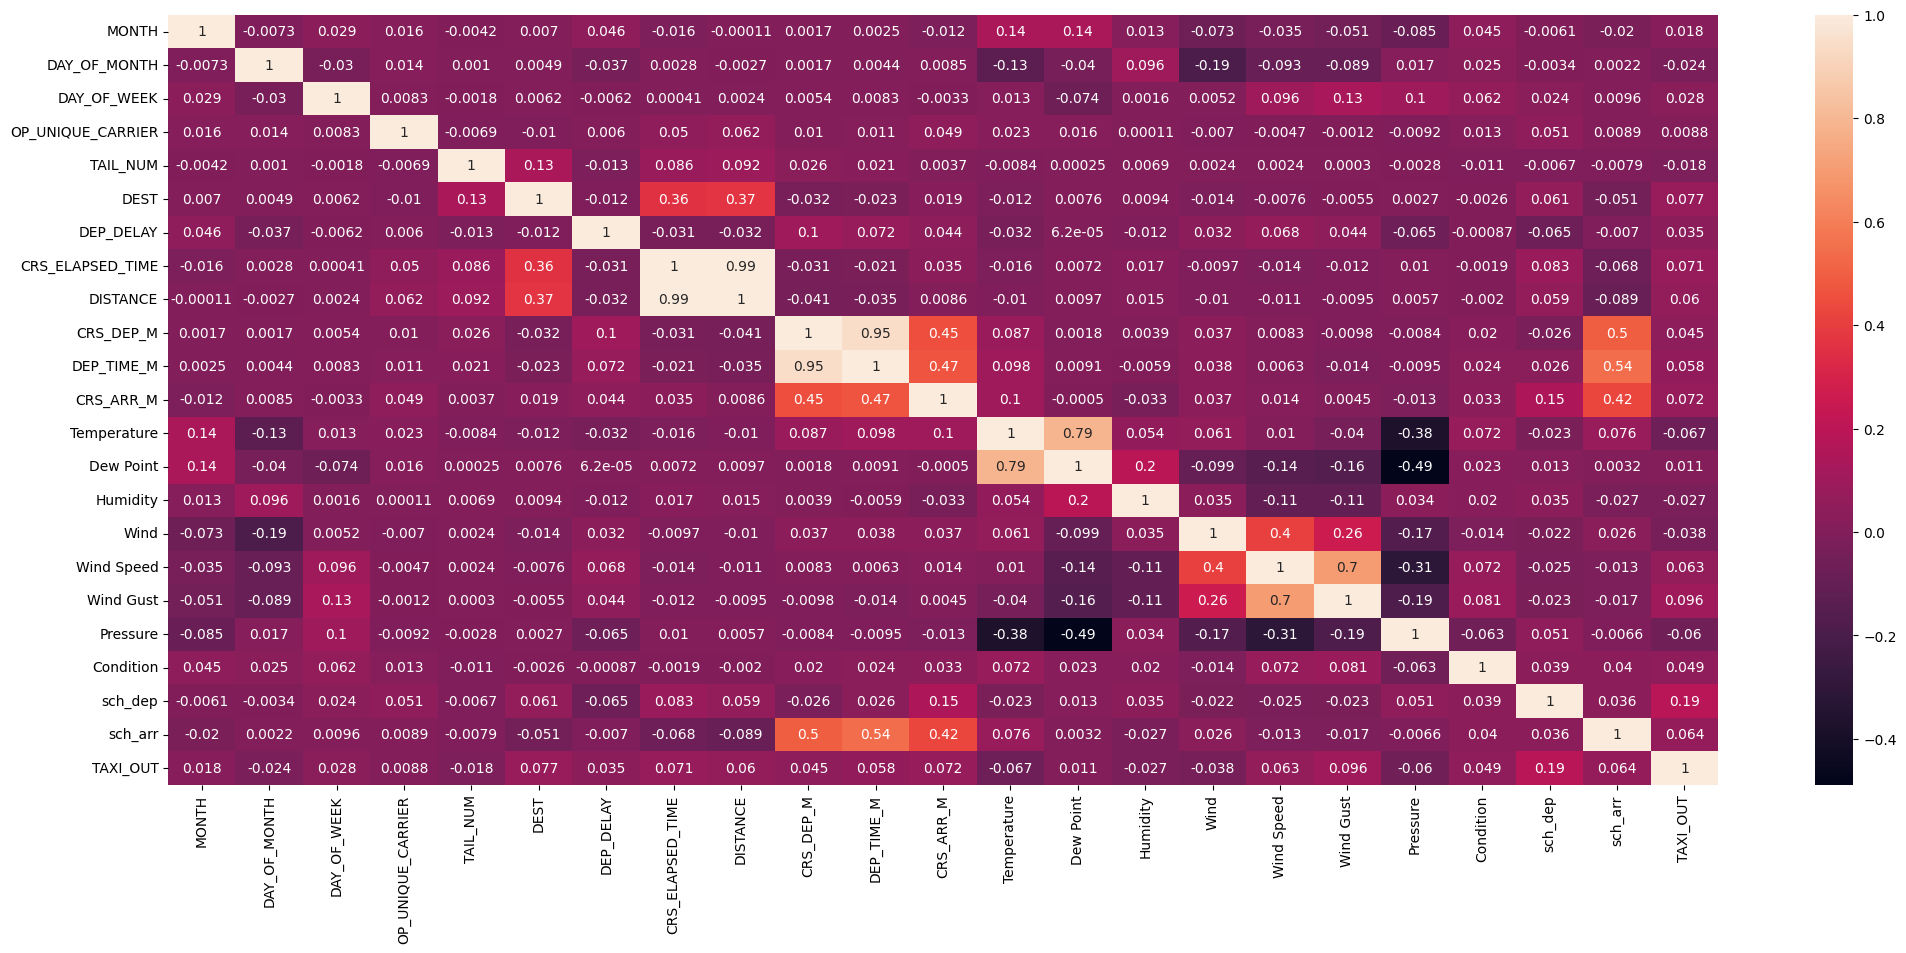

In [21]:
## visualize the correlation matrix
plt.figure(figsize=(25,10))
sns.heatmap(corr_matrix, annot=True)

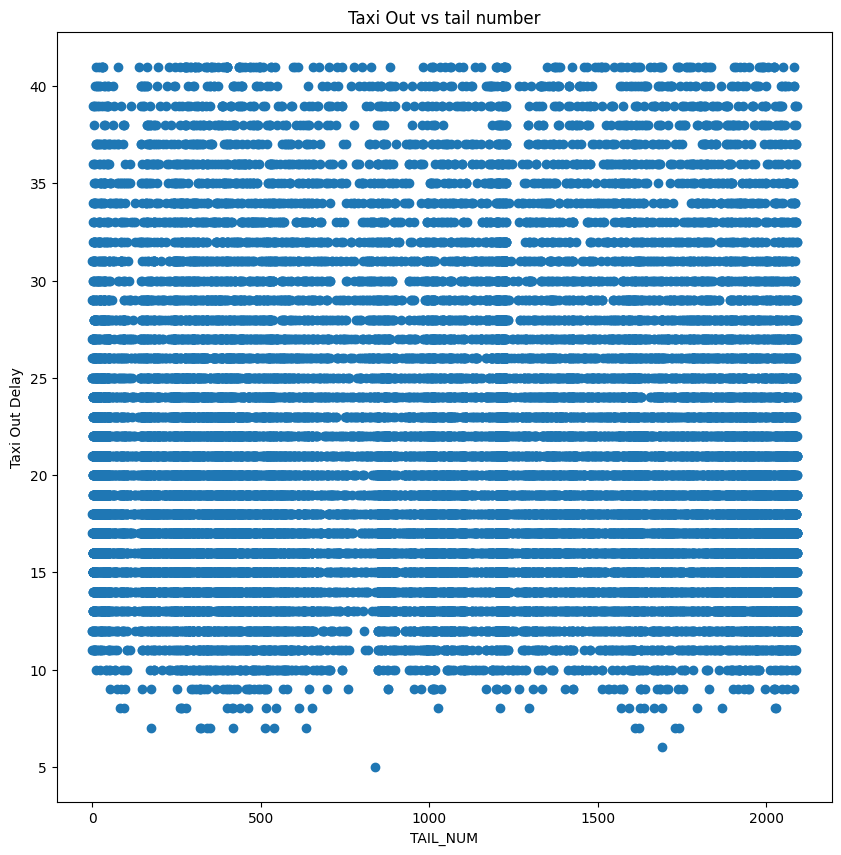

In [22]:
plt.figure(figsize=(10,10))

plt.title('Taxi Out vs tail number')
plt.ylabel('Taxi Out Delay')

plt.scatter(dfJRKFlights['TAIL_NUM'], dfJRKFlights['TAXI_OUT'])
plt.xlabel('TAIL_NUM')

plt.show()

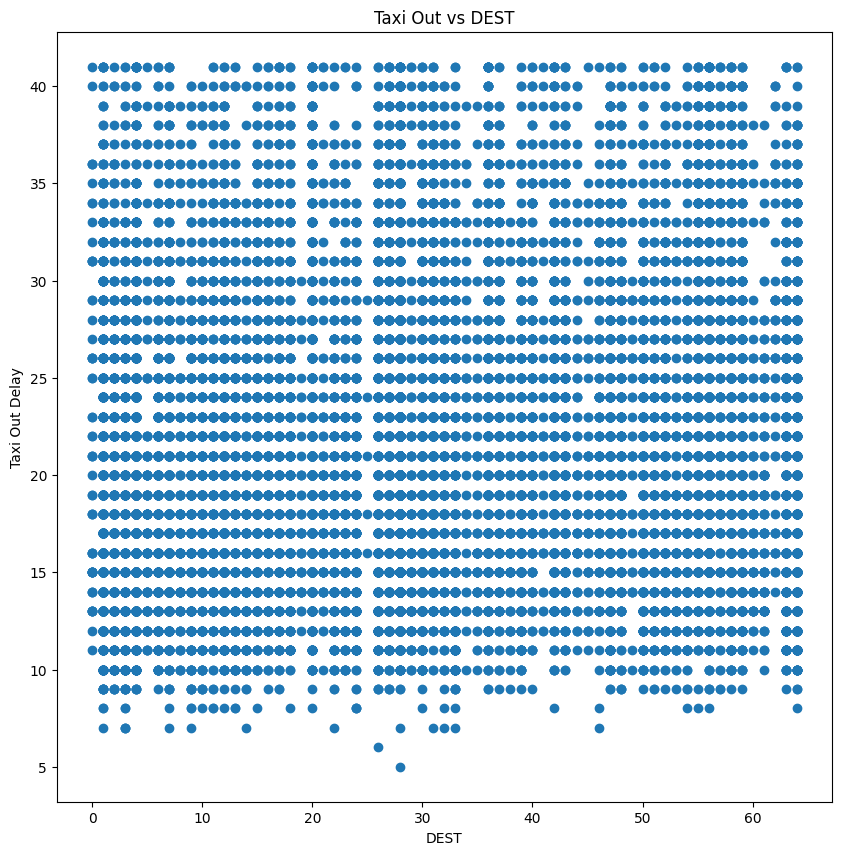

In [23]:
plt.figure(figsize=(10,10))

plt.title('Taxi Out vs DEST')
plt.ylabel('Taxi Out Delay')

plt.scatter(dfJRKFlights['DEST'], dfJRKFlights['TAXI_OUT'])
plt.xlabel('DEST')

plt.show()

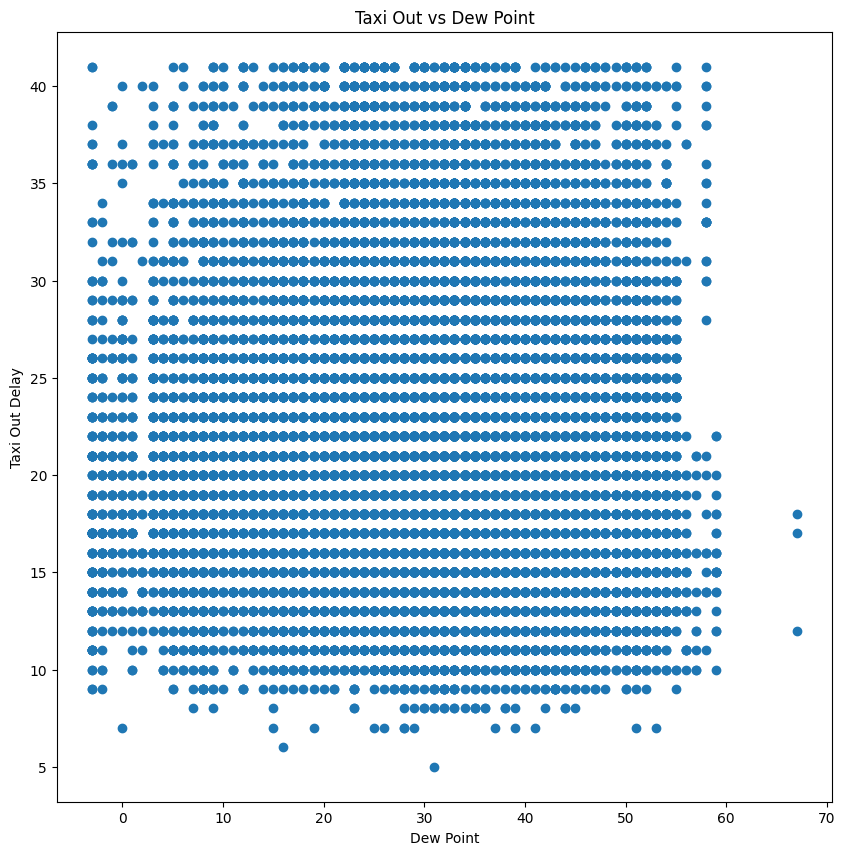

In [24]:
plt.figure(figsize=(10,10))

plt.title('Taxi Out vs Dew Point')
plt.ylabel('Taxi Out Delay')

plt.scatter(dfJRKFlights['Dew Point'], dfJRKFlights['TAXI_OUT'])
plt.xlabel('Dew Point')

plt.show()

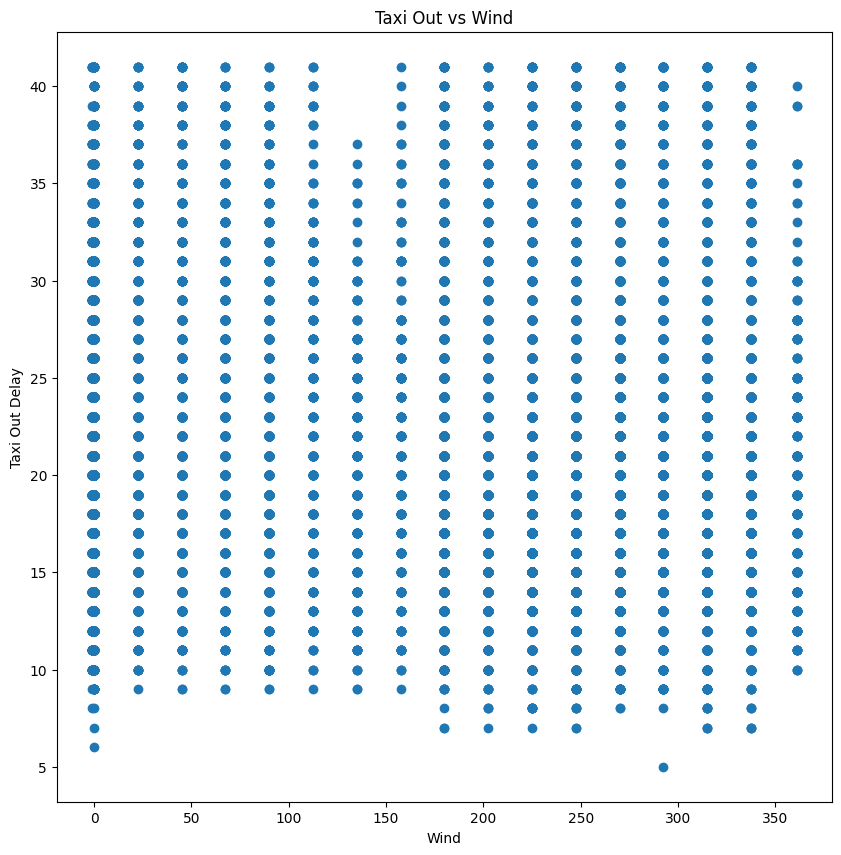

In [25]:
plt.figure(figsize=(10,10))

plt.title('Taxi Out vs Wind')
plt.ylabel('Taxi Out Delay')

plt.scatter(dfJRKFlights['Wind'], dfJRKFlights['TAXI_OUT'])
plt.xlabel('Wind')

plt.show()

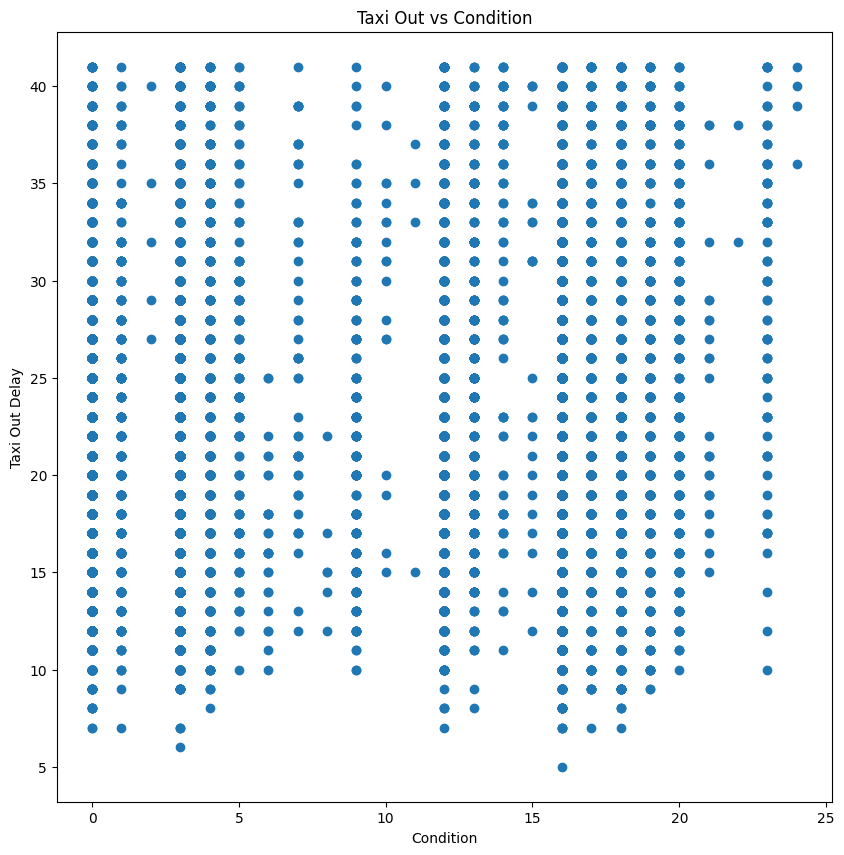

In [26]:
plt.figure(figsize=(10,10))

plt.title('Taxi Out vs Condition')
plt.ylabel('Taxi Out Delay')

plt.scatter(dfJRKFlights['Condition'], dfJRKFlights['TAXI_OUT'])
plt.xlabel('Condition')

plt.show()

In [ ]:
## build the machine learning algorithm
x = dfJRKFlights[['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','OP_UNIQUE_CARRIER','TAIL_NUM','DEST','DEP_DELAY','CRS_ELAPSED_TIME','DISTANCE','CRS_DEP_M','DEP_TIME_M','CRS_ARR_M','Temperature','Dew Point','Humidity','Wind','Wind Speed','Wind Gust','Pressure','Condition','sch_dep','sch_arr']].values
y = dfJRKFlights['TAXI_OUT'].values


In [28]:
## data spliting test_size is 20% of data for testing, leaving 80% for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [30]:
x_train

array([[11., 12.,  2., ..., 13., 52., 19.],
       [11., 22.,  5., ..., 12., 27., 40.],
       [11., 27.,  3., ...,  0., 28., 27.],
       ...,
       [11.,  3.,  7., ...,  3., 25., 40.],
       [12., 21.,  6., ..., 18., 35., 42.],
       [ 1., 15.,  3., ..., 18., 27., 28.]], shape=(23054, 22))

In [31]:
## feature scaling - massively different scales to the numbers, from 1 to 7 for weekday, 1 to 31 for month day, -1 to 361 for wind etc.
## standard scaler transforms data to have a mean of 0 and a standard deviation of 1
## minmaxscaler ---- min, max 0, 1
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [32]:
## multi linear regression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [33]:
## prediction on the test set
y_pred_mlr = lin_reg.predict(x_test)

In [34]:
## put in a dataframe
pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr })

,Actual value,Predicted value
0,14,24.295276
1,25,24.021355
2,25,24.485340
3,26,22.205721
4,27,22.641837
...,...,...
5759,10,16.894911
5760,23,19.050596
5761,19,21.643356
5762,22,21.392819


In [35]:
## model evaluation 
## r2, mean absolute error, mean square error, root mean square error
## 0, 1
## mae must have a lower mae 0. 
## mse --o.
## rmse 0. 
r2 = metrics.r2_score(y_test, y_pred_mlr)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)

R2: 0.09391924627783599
Mean Absolute Error: 5.190499296336038
Mean Square Error: 41.86782076407524
Root Mean Square Error: 6.47053481283234


In [ ]:
# fudge the model
model_lasso = Lasso(alpha=0.10)
model_ridge = Ridge(alpha=0.10)
model_lasso.fit(x,y)
model_ridge.fit(x,y)


Ridge(alpha=0.1)

In [37]:
x_test.shape

(5764, 22)

In [38]:
#dfxtest = x_test.values
dfxtest = pd.DataFrame(x_test)

new = dfxtest.iloc[0,0:22] # get first row of data, excluding institution
new

0     0.622223
1     0.909617
2     1.504495
3     0.096177
4    -0.991489
5     0.261969
6     0.208112
7    -0.513543
8    -0.594239
9     0.511514
10    0.552927
11    0.514326
12    0.061583
13    0.535453
14    1.036079
15    1.020791
16    1.380090
17    1.966011
18   -2.345265
19    0.361026
20    0.090986
21    0.681103
Name: 0, dtype: float64

In [39]:
predict_lasso = model_lasso.predict([new])
predict_lasso

array([17.88554331])

In [40]:
predict_ridge = model_ridge.predict([new])
predict_ridge

array([49.78171942])

In [41]:
dfytest = pd.DataFrame(y_test)

actual = dfytest.iloc[0,0] # get first  row of data, excluding institution
print(actual)

14


In [42]:
## support vector regression
## radial basis function 
svr = SVR(kernel= 'linear')
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [43]:
## prediction on the test data
y_pred_svr = svr.predict(x_test)

In [44]:
## put in a dataframe
pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_svr })

,Actual value,Predicted value
0,14,23.259535
1,25,22.755534
2,25,23.133976
3,26,20.825057
4,27,21.500383
...,...,...
5759,10,15.661979
5760,23,17.712124
5761,19,20.734167
5762,22,20.136381


In [45]:
r2 = metrics.r2_score(y_test, y_pred_svr)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_svr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_svr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)
#LOL, it's worse now!

R2: 0.0756825744752031
Mean Absolute Error: 5.075928847734729
Mean Square Error: 42.71049367510368
Root Mean Square Error: 6.535326592841683


In [46]:
## random forest regression
reg = RandomForestRegressor(n_estimators=10)
reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10)

In [47]:
## prediction on the test data
y_pred_rf = reg.predict(x_test)

In [48]:
## put in a dataframe
pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_rf })

,Actual value,Predicted value
0,14,24.8
1,25,24.6
2,25,28.6
3,26,23.7
4,27,24.5
...,...,...
5759,10,12.9
5760,23,18.8
5761,19,18.1
5762,22,27.9


In [49]:
r2 = metrics.r2_score(y_test, y_pred_rf)
meanABerr = metrics.mean_absolute_error(y_test, y_pred_rf)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_rf)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
print('R2:',r2)
print('Mean Absolute Error:',meanABerr)
print('Mean Square Error:',meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)
# Definitely better. I just wish I knew what a random forest regression was.

R2: 0.2321392725195076
Mean Absolute Error: 4.669552394170715
Mean Square Error: 35.48100451075642
Root Mean Square Error: 5.956593364563038
